In [1]:
from pathlib import Path
import pandas as pd
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [2]:
DATAFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/IPR paper/data_files")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/IPR paper/figures")

In [5]:
df = pd.read_csv(DATAFOLDER / 'fig_3_food_intake.csv')
print(df.head())

       ID   sex group  week_0  week_1  week_2  week_3  week_4  week_5  week_6  \
0  MPX303  male   IPR     2.1    2.85    3.20    3.35    3.63    3.10    3.60   
1  MPX304  male   IPR     3.3    3.01    2.50    3.20    2.67    2.70    3.70   
2  MPX309  male   IPR     3.0    2.91    3.10    3.07    3.30    3.40    3.55   
3  MPX310  male   IPR     3.3    2.46    2.60    2.78    2.75    2.85    3.65   
4  MPX315  male   IPR     3.5    2.95    2.95    2.98    2.87    2.70    3.75   

   week_7  week_8  avg_weeks_IPR_on_PR_diet  avg_weeks_IPR_on_NR_diet  
0    3.20    3.60                      3.12                      3.51  
1    3.10    3.50                      3.00                      3.09  
2    3.75    3.50                      3.28                      3.36  
3    3.25    3.20                      2.83                      3.05  
4    3.75    3.74                      3.09                      3.33  


In [9]:
# Melt the DataFrame to long format
df_long = df.melt(id_vars=['ID', 'sex', 'group'], 
                  value_vars=['week_0', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8'],
                  var_name='week', 
                  value_name='food intake')

# Convert 'week' to a numeric value for easier plotting
df_long['week'] = df_long['week'].str.extract('(\d+)').astype(int)

# Calculate mean and SEM
df_stats = df_long.groupby(['sex', 'group', 'week']).agg(
    mean_food_intake=('food intake', 'mean'),
    sem_food_intake=('food intake', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Filter by sex
df_male_stats = df_stats[df_stats['sex'] == 'male']
df_female_stats = df_stats[df_stats['sex'] == 'female']


In [16]:
df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

In [17]:
avg_weeks_IPR_on_PR_diet_males = df_males.groupby('group')['avg_weeks_IPR_on_PR_diet'].apply(list).to_dict()
avg_weeks_IPR_on_NR_diet_males = df_males.groupby('group')['avg_weeks_IPR_on_NR_diet'].apply(list).to_dict()

avg_weeks_IPR_on_PR_diet_females = df_females.groupby('group')['avg_weeks_IPR_on_PR_diet'].apply(list).to_dict()
avg_weeks_IPR_on_NR_diet_females = df_females.groupby('group')['avg_weeks_IPR_on_NR_diet'].apply(list).to_dict()

In [26]:
def create_barscatter(ax, data_baseline_values, data_end_values):
    tp.barscatter(
        [[data_baseline_values["NR"], data_end_values["NR"]], 
         [data_baseline_values["PR"], data_end_values["PR"]],
         [data_baseline_values["IPR"], data_end_values["IPR"]]],
        paired=True,
        barfacecolor_option='individual',
        barfacecolor=[color for group in group_labels for color in colors[group]],
        scattersize=scattersize,
        grouplabel=group_labels,
        scatteralpha=0.6,
        fontsize=12,
        ax=ax)

In [21]:
colors = {'NR': ["#FF7F0E", "#ffb370"],
          'PR': ["#9467BD", "#c4abdb"],
          'IPR': ["#17BECF", "#90eaf3"]}

first_colors = {group: color_list[0] for group, color_list in colors.items()}

markers = {'NR': "o",
          'PR': "D",
          'IPR': "v"}

group_labels = ["NR", "PR", "IPR"]
scattersize=50

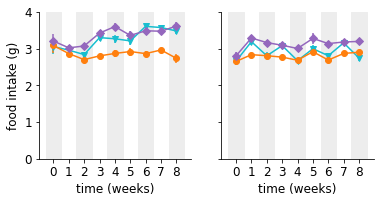

In [22]:
# FOOD INTAKE OVER TIME
f,ax=plt.subplots(figsize=(6, 3),ncols=2, sharey=True, gridspec_kw={"bottom": 0.2})

for group in df_male_stats['group'].unique():
    subset = df_male_stats[df_male_stats['group'] == group]
    ax[0].errorbar(subset['week'], subset['mean_food_intake'], yerr=subset['sem_food_intake'],
                 label=group, color=first_colors[group], marker=markers[group])

for group in df_female_stats['group'].unique():
    subset = df_female_stats[df_female_stats['group'] == group]
    ax[1].errorbar(subset['week'], subset['mean_food_intake'], yerr=subset['sem_food_intake'],
                 label=group, color=first_colors[group], marker=markers[group])
    

#grey for weeks when IPR is on NR diet    
x_ranges = [(-0.5, 0.5), (1.5, 2.5), (3.5, 4.5), (5.5, 6.5), (7.5, 8.5)]

for subplot in ax:
    for start, end in x_ranges:
        subplot.axvspan(start, end, color='#ededed')

        
ax[0].set_ylim(0,4)

ax[0].set_ylabel("food intake (g)", fontsize = 12)

for ax in [ax[0],ax[1]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('time (weeks)', fontsize = 12)
    ax.set_xticks([0,1,2,3,4,5,6,7,8]) 

    
f.savefig(FIGSFOLDER / "food_intake.pdf")    

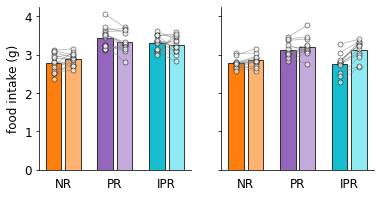

In [29]:
# FOOD INTAKE TYPE OF WEEK

f,ax=plt.subplots(figsize=(6, 3),ncols=2, sharey=True)

create_barscatter(ax[0], avg_weeks_IPR_on_NR_diet_males, avg_weeks_IPR_on_PR_diet_males)
create_barscatter(ax[1], avg_weeks_IPR_on_NR_diet_females, avg_weeks_IPR_on_PR_diet_females)


ax[0].set_ylabel("food intake (g)", fontsize = 12)
for ax in [ax[0],ax[1]]:
    ax.tick_params(axis='both', which='major', labelsize=12)

f.savefig(FIGSFOLDER / "food_intake_week_type.pdf")    